In [1]:
#Here we have item based collaribority system, we find similarity between movies.
#using cosine similarity method.
#if model fine similarity between user, then it will user based collaribority system.

##### Nearest Neighbours Item based collarbotive system

In [2]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading dataset
movies_df = pd.read_csv("C:\PythonCSV\CSV_file\movies.csv")

In [4]:
ratings_df = pd.read_csv("C:/PythonCSV/CSV_file/ratings.csv", usecols= ['userId','movieId', 'rating'])

In [5]:
ratings_df.head()

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0


In [6]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
movies_df.shape

(9125, 3)

In [8]:
ratings_df.shape

(100004, 3)

In [9]:
df = pd.merge(ratings_df, movies_df, on = 'movieId')

In [10]:
df.head()

,userId,movieId,rating,title,genres
0,1,31,2.5,Dangerous Minds (1995),Drama
1,7,31,3.0,Dangerous Minds (1995),Drama
2,31,31,4.0,Dangerous Minds (1995),Drama
3,32,31,4.0,Dangerous Minds (1995),Drama
4,36,31,3.0,Dangerous Minds (1995),Drama


In [11]:
df.dropna(inplace = True, subset = ['title'])

In [12]:
df.head()

,userId,movieId,rating,title,genres
0,1,31,2.5,Dangerous Minds (1995),Drama
1,7,31,3.0,Dangerous Minds (1995),Drama
2,31,31,4.0,Dangerous Minds (1995),Drama
3,32,31,4.0,Dangerous Minds (1995),Drama
4,36,31,3.0,Dangerous Minds (1995),Drama


In [13]:
df.isnull().sum()

userId     0
movieId    0
rating     0
title      0
genres     0
dtype: int64

In [14]:
#now we count total ratings for each movies.
movie_ratingsCount = df.groupby('title')['rating'].count().reset_index()

In [15]:
movie_ratingsCount.head()

,title,rating
0,"""Great Performances"" Cats (1998)",2
1,$9.99 (2008),3
2,'Hellboy': The Seeds of Creation (2004),1
3,'Neath the Arizona Skies (1934),1
4,'Round Midnight (1986),2


In [16]:
movie_ratingsCount.rename(columns = {"rating": "TotalratingCount"}, inplace = True)

In [17]:
movie_ratingsCount.head()

,title,TotalratingCount
0,"""Great Performances"" Cats (1998)",2
1,$9.99 (2008),3
2,'Hellboy': The Seeds of Creation (2004),1
3,'Neath the Arizona Skies (1934),1
4,'Round Midnight (1986),2


In [18]:
rating_with_ratingCount = df.merge(movie_ratingsCount, on = 'title', how = 'left')

In [19]:
rating_with_ratingCount.head()

,userId,movieId,rating,title,genres,TotalratingCount
0,1,31,2.5,Dangerous Minds (1995),Drama,42
1,7,31,3.0,Dangerous Minds (1995),Drama,42
2,31,31,4.0,Dangerous Minds (1995),Drama,42
3,32,31,4.0,Dangerous Minds (1995),Drama,42
4,36,31,3.0,Dangerous Minds (1995),Drama,42


In [20]:
movie_ratingsCount['TotalratingCount'].describe()

count    9064.000000
mean       11.033098
std        24.053106
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max       341.000000
Name: TotalratingCount, dtype: float64

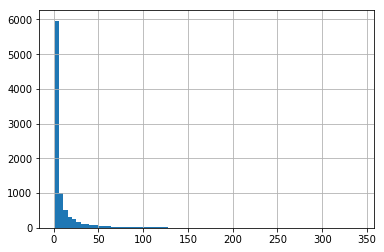

In [21]:
movie_ratingsCount['TotalratingCount'].hist(bins = 70)

In [22]:
popularity_threshold = 50
rating_popular_movie = rating_with_ratingCount.query('TotalratingCount >= @popularity_threshold')

In [23]:
rating_popular_movie.head()

,userId,movieId,rating,title,genres,TotalratingCount
351,1,1339,3.5,Dracula (Bram Stoker's Dracula) (1992),Fantasy|Horror|Romance|Thriller,52
352,15,1339,2.0,Dracula (Bram Stoker's Dracula) (1992),Fantasy|Horror|Romance|Thriller,52
353,19,1339,3.0,Dracula (Bram Stoker's Dracula) (1992),Fantasy|Horror|Romance|Thriller,52
354,22,1339,4.5,Dracula (Bram Stoker's Dracula) (1992),Fantasy|Horror|Romance|Thriller,52
355,30,1339,4.0,Dracula (Bram Stoker's Dracula) (1992),Fantasy|Horror|Romance|Thriller,52


In [24]:
rating_popular_movie.shape

(43083, 6)

In [25]:
#now we create pivot table
movie_feature_df = rating_popular_movie.pivot_table(index = 'title', columns = 'userId',values = 'rating').fillna(0)

In [26]:
movie_feature_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
12 Angry Men (1957),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001: A Space Odyssey (1968),0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28 Days Later (2002),0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
300 (2007),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
#now converting above dataframe to array matrix
from scipy.sparse import csr_matrix
movies_matrix = csr_matrix(movie_feature_df.values)

In [28]:
movies_matrix

<453x670 sparse matrix of type '<class 'numpy.float64'>'
	with 43083 stored elements in Compressed Sparse Row format>

In [29]:
#here we used cosine similarity method
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric= 'cosine', algorithm= 'brute')

In [30]:
#p = 2 here distance is euclidean distance
model_knn.fit(movies_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [31]:
movie_feature_df.shape

(453, 670)

In [32]:
query_index = np.random.choice(movie_feature_df.shape[0])

In [33]:
query_index

302

In [34]:
distances, indices = model_knn.kneighbors(movie_feature_df.iloc[query_index, :].values.reshape(1,-1), n_neighbors= 6)

In [35]:
movie_feature_df.index[indices.flatten()]

Index(['Office Space (1999)', 'Ferris Bueller's Day Off (1986)',
       'Fight Club (1999)', 'Princess Bride, The (1987)',
       'Groundhog Day (1993)', 'Almost Famous (2000)'],
      dtype='object', name='title')

In [36]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print("Recommendation for {}:\n".format(movie_feature_df.index[query_index]))
    else:
        print("{0}:{1}, with distance of {2}".format(i, movie_feature_df.index[indices.flatten()[i]],distances.flatten()[i]))

Recommendation for Office Space (1999):

1:Ferris Bueller's Day Off (1986), with distance of 0.4154742056904307
2:Fight Club (1999), with distance of 0.47935601559229557
3:Princess Bride, The (1987), with distance of 0.49102933724529585
4:Groundhog Day (1993), with distance of 0.5117497673832339
5:Almost Famous (2000), with distance of 0.5134197013545332
